<a href="https://colab.research.google.com/github/Astridgiraldo/RH/blob/main/AFINAMIENTO_HIPERPARAMETROS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importamos las librerías necesarias
import pandas as pd
import plotly.express as px
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score, classification_report
from sklearn.feature_selection import SelectFromModel, f_classif, SelectKBest
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [ ]:
#Conexión a Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Carga de BD desde drive

X_total2015 ='/content/drive/MyDrive/analitica3/base_datos/X_total2015.csv'
y2016 ='/content/drive/MyDrive/analitica3/base_datos/y2016.csv'
var_imp_dtc = '/content/drive/MyDrive/analitica3/base_datos/var_imp_dtc.csv'

X_total2015 = pd.read_csv(X_total2015)
y2016 = pd.read_csv(y2016)
var_imp_dtc = pd.read_csv(var_imp_dtc)

pd.set_option('display.max_columns', None) #muestra todas las columnas de tablas

In [ ]:
#Estandarización de la variable objetivo

le = LabelEncoder()
y2016 = le.fit_transform(y2016)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_total2015, y2016, test_size=0.2, random_state=42)

#Imprimir Tamaño de dataset, corresponden al 80,20
print("Tamaño del conjunto de entrenamiento. X: ", X_train.shape," Y: ", y_train.shape)
print("Tamaño del conjunto de validación. X: ", X_test.shape," Y: ", y_test.shape )

#Nombre de caracteristicas númericas
#numeric_columns=list(X_total.select_dtypes('float64').columns)

#Estandarización de variables númericas
pipeline=ColumnTransformer([( "std_numericas",MinMaxScaler() , X_total2015.columns)], remainder='passthrough')

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

Tamaño del conjunto de entrenamiento. X:  (3528, 46)  Y:  (3528,)
Tamaño del conjunto de validación. X:  (882, 46)  Y:  (882,)


In [ ]:
parameters = [{
    'n_estimators':[50,100],
    'max_depth':[5,10,30,50,100,200],
    'max_features':[0.1,0.5,0.9],
    'criterion':['gini', 'entropy'],
    'class_weight':['balanced', None]
}]

#Definición del modelo
ranfor=RandomForestClassifier(random_state=42)

grid_search=GridSearchCV(ranfor, parameters, cv=5, scoring='accuracy',n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)
bp=grid_result.best_params_

print('Best parameters: ', grid_result.best_params_)
print('Best score: ',grid_result.best_score_)

Best parameters:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 30, 'max_features': 0.9, 'n_estimators': 100}
Best score:  0.9693866152331585


**Definición de hiperparámetros**

In [ ]:
#Creacion modelo RandomForestClassifier
v2_ranfor=RandomForestClassifier(
        class_weight='balanced',
        n_estimators=100,
        criterion='entropy',
        max_depth=30,
        random_state=42,
        max_features=0.5
)
v2_ranfor.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=30, max_features=0.5, random_state=42)

In [ ]:
#Metricas de desempeño
# ==============================================================================
print ("Train - Accuracy :", metrics.accuracy_score(y_train, v2_ranfor.predict(X_train)))
print ("Train - classification report:\n", metrics.classification_report(y_train, v2_ranfor.predict(X_train)))
print ("Test - Accuracy :", metrics.accuracy_score(y_test, v2_ranfor.predict(X_test)))
print ("Test - classification report :\n", metrics.classification_report(y_test, v2_ranfor.predict(X_test)))

Train - Accuracy : 1.0
Train - classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3003
           1       1.00      1.00      1.00       525

    accuracy                           1.00      3528
   macro avg       1.00      1.00      1.00      3528
weighted avg       1.00      1.00      1.00      3528

Test - Accuracy : 0.9750566893424036
Test - classification report :
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       757
           1       0.91      0.92      0.91       125

    accuracy                           0.98       882
   macro avg       0.95      0.95      0.95       882
weighted avg       0.98      0.98      0.98       882



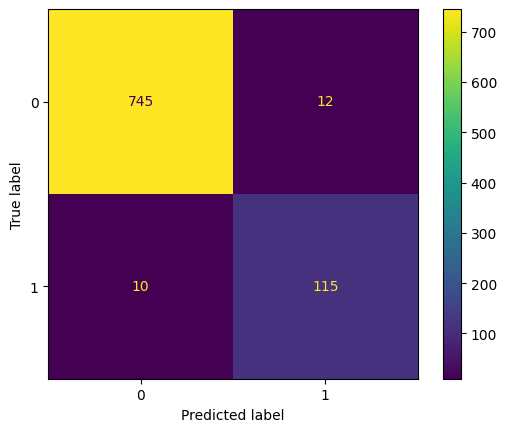

In [ ]:
#Matriz de confusión
cm2=confusion_matrix(y_test,v2_ranfor.predict(X_test))
# Visualización de la matriz de confusión
cm2_display=ConfusionMatrixDisplay(confusion_matrix=cm2)
cm2_display.plot()
plt.show()

**El modelo ha tenido nuevamente una precisión perfecta en el entrenamiento como era de esperarse, lo que podría indicar por segunda ocasión un posible sobreajuste. El rendimiento en el conjunto de prueba sigue siendo muy bueno, incluso presentando un pequeño aumento, con una precisión general de más del 98% lo que puede indicar que el tuneo de hiperparámetros sirvió para que los posibles errores en la predicción sean mínimos y así el modelo logre ayudar a tomar decisiones en el año 2017.**

In [ ]:
#Importacia de cada factor
columns=pd.DataFrame(X_total2015.columns).rename(columns={0:'columns'})
#Creación del Data frame con el nivel de importacia
importances=pd.DataFrame(v2_ranfor.feature_importances_).rename(columns={0:'importances'})
cf=pd.concat([columns,importances], axis=1)

#Se organiza el Dataframe de mayor a menor y se escoge el top 10
cf=cf.sort_values('importances',ascending=False).head(10)


#Creación del gráfico
fig = px.bar(cf, x='importances', y='columns', color = 'columns',  title ='<b>Importancia de los factores que analiza el modelo  (Top 10) <b>')

# agregar detalles a la gráfica
fig.update_layout(
    xaxis_title = 'Importancia de los factores',
    yaxis_title = 'Factores',
    template = 'simple_white',
    title_x = 0.5,
    showlegend=False)

In [ ]:
cf.head(10)

,columns,importances
2,monthlyincome,0.107729
0,age,0.090570
9,totalworkingyears,0.076656
1,distancefromhome,0.071779
5,yearsatcompany,0.059215
7,yearswithcurrmanager,0.058966
3,percentsalaryhike,0.058095
8,numcompaniesworked,0.049847
4,trainingtimeslastyear,0.047023
6,yearssincelastpromotion,0.046460


**Finalmente se identifican las 10 variables que más explican la variable objetivo por lo que con ellas se formularán una serie de estrategias para tomar en cuenta en el año 2017 en cuanto al retiro de empleados**